In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [259]:
# size of E and I population 
N_E = 400
N_I = 100 

In [260]:
V_rest = -70.0 # mV, resting membrane potential 

In [261]:
dt = 0.1 

In [262]:
# tau 
tau_E = 20.0 # ms, E neuron time constant 
tau_I = 10.0 # ms, I neuron time constant 

In [263]:
tau_syn = 2.0 # ms, synaptic time constant 

In [268]:
n_steps = 10000

# record 
V_list = np.empty((N_E+N_I, n_steps))
spike_time_list = [[] for i in range(N_E+N_I)]
Spike_list = np.empty((N_E+N_I, n_steps))

# Initialize 
# Initial potential for all neurons 
V = V_rest*np.ones((N_E+N_I,1))
V_rest_vec = V_rest*np.ones((N_E+N_I,1))

# H: input
h = 2.0 # mV,input baseline 
H = h*np.ones((N_E+N_I,1))

# noise 
noise = 0*np.zeros((N_E+N_I,1))

# tau 
tau = np.concatenate((tau_E*np.ones((N_E,1)), tau_I*np.ones((N_I,1))), axis=0)

# postsynaptic current 
A = np.zeros((N_E+N_I,1))

# spike 
axon_delay = 5 # 5*dt, 0.5 ms as axon delay 

# connectivity
W = get_connectivity(N_E=N_E, N_I=N_I)

for i_step in range(n_steps):
    
    # update postsynaptic currents 
    A_spike = np.zeros((N_E+N_I,1)) 
    for i_neuron in range(N_E+N_I):
        if len(spike_time_list[i_neuron])>0:
            if i_step - spike_time_list[i_neuron][-1] == axon_delay: 
                A_spike[i_neuron]=1
    dA = dt*(-A/tau_syn + A_spike)
    A = A+dA
    
    # get momentary firing rate 
    R = k*np.power(np.maximum(0.0, np.floor(V-V_rest_vec)), n)
    
    # simulate firing 
    prob_spike = dt*R
    for ind, i_p in enumerate(prob_spike):
        if np.random.random()<i_p: # if spike 
            spike_time_list[ind].append(i_step)
            Spike_list[ind,i_step] = 1
        
    # update V 
    V_list[:, i_step]=V.reshape(N_E+N_I,)
    dV = np.divide(dt*(-V + V_rest_vec + H + noise + W.dot(A)), tau)
    V = V + dV

In [269]:
spike_time_list = np.asarray(spike_time_list)

In [270]:
test = spike_time_list[:][:100]

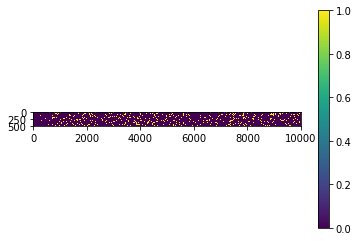

In [272]:
plt.imshow(Spike_list[:,])
plt.colorbar()

In [207]:
spike = [1,2]

In [208]:
i_step = 2

In [211]:
for ind,i_spike in enumerate(spike):
    a[i_spike].append(i_step)

In [213]:
a[1][-1]

2

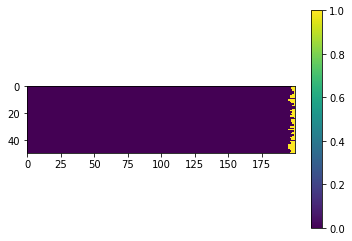

In [247]:
plt.imshow(Spike_list[:, :200])
plt.colorbar()

In [179]:
plot_spike_list = Spike_list[:, :200]

In [180]:
spike_plot = np.nonzero(plot_spike_list)

In [181]:
spike_plot.shape

AttributeError: 'tuple' object has no attribute 'shape'

## Connectivity

In [45]:
def get_connectivity(N_E=40, 
                    N_I = 10,
                    p_E = 0.1, # connection probability for E presynaptic partners 
                    p_I = 0.4, # connection probability for I presynaptic partners
                    W_EE = 1.25, # mV*s, connection weight
                    W_IE = 1.2, # mV*s, connection weight
                    W_EI = -0.65, # mV*s, connection weight
                    W_II = -0.5, # mV*s, connection weight
                    tau_syn = 2.0 # ms, synaptic time constant
                    ):
    
    # get synaptic weight 
    J_EE = W_EE/(tau_syn*p_E*N_E)
    J_IE = W_IE/(tau_syn*p_E*N_E)
    J_EI = -W_EI/(tau_syn*p_I*N_I)
    J_II = -W_II/(tau_syn*p_I*N_I)
    
    # count of E and I presynaptic partners 
    count_E = int(p_E*N_E)
    count_I = int(p_I*N_I)
    
    W = np.zeros((N_E+N_I, N_E+N_I))
    
    for i_E in range(N_E):
        # E -> E 
        pre_part_E = np.random.choice(N_E, count_E, replace=False)
        W[i_E,pre_part_E] = J_EE
        
        # I -> E 
        pre_part_I = N_E + np.random.choice(N_I, count_I, replace=False)
        W[i_E, pre_part_I] = J_IE 
        
    for i_I in range(N_I):
        # E -> I 
        pre_part_E = np.random.choice(N_E, count_E, replace=False)
        W[i_I+N_E,pre_part_E] = J_EI
        
        # I -> I 
        pre_part_I = N_E + np.random.choice(N_I, count_I, replace=False)
        W[i_I+N_E, pre_part_I] = J_II 
        
    return W       

## spike emitting

In [51]:
k = 0.3 # mV^-n*s^-1, nonlinearity gain 
n = 2 # nonlinearity exponent

In [52]:
dt = 0.1 # time step